In [ ]:
!pip install -U ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 86.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
!nvidia-smi

Mon Jan  5 18:45:27 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   35C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9PX08KDhvi9PBvP61JA9")
project = rf.workspace("sahan-2iobg").project("coral-instance-segmentation-2-dkwb1")
version = project.version(4)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to coral-instance-segmentation-2-4 in yolov11:: 100%|██████████| 2314/2314 [00:00<00:00, 4945.04it/s]


In [ ]:
# Fast baseline training: YOLO11 small segmentation model
!yolo task=segment mode=train \
    model=yolo11s-seg.pt \
    data=/content/coral-instance-segmentation-2-4/data.yaml\
    epochs=60 \
    batch=8 \
    imgsz=640 \
    device=0 \
    name=coral_yolo11s_seg_fast \
    workers=4 \
    augment=True


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/coral-instance-segmentation-2-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/segment/coral_yolo11s_seg_fast/weights/best.pt')

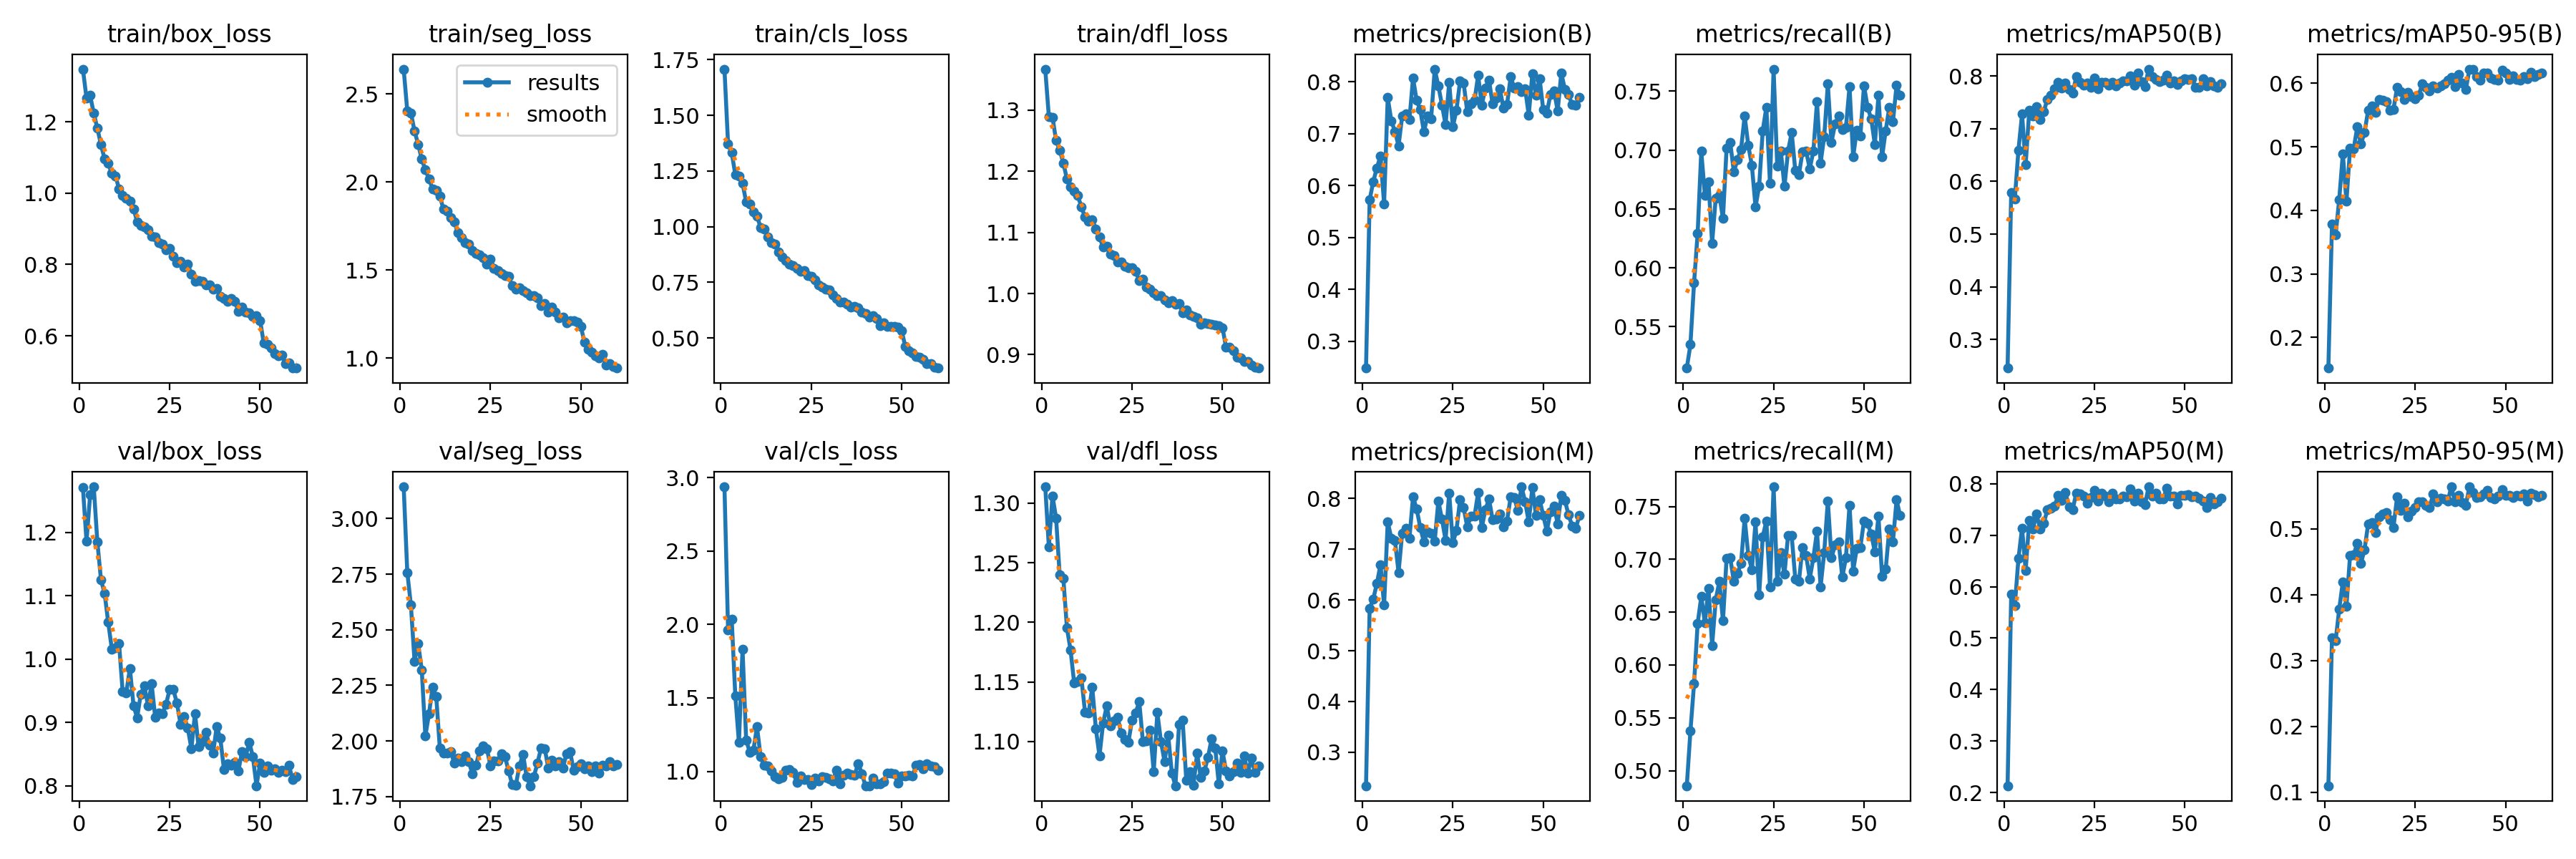

In [ ]:
# show training plots (if enabled)
from IPython.display import Image, display
display(Image("/content/runs/segment/coral_yolo11s_seg_fast/results.png"))

In [ ]:
results = model.predict(
    source="/content/coral-instance-segmentation-2-4/test/images/GOPR6698_JPG.rf.1f24486ab5c42f6070ec103c7153cb1c.jpg",
    save=True,
    conf=0.25,
    imgsz=640
)


image 1/1 /content/coral-instance-segmentation-2-4/test/images/GOPR6698_JPG.rf.1f24486ab5c42f6070ec103c7153cb1c.jpg: 640x640 2 corals, 11.2ms
Speed: 2.2ms preprocess, 11.2ms inference, 27.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/segment/predict


In [ ]:
import matplotlib.pyplot as plt
import cv2

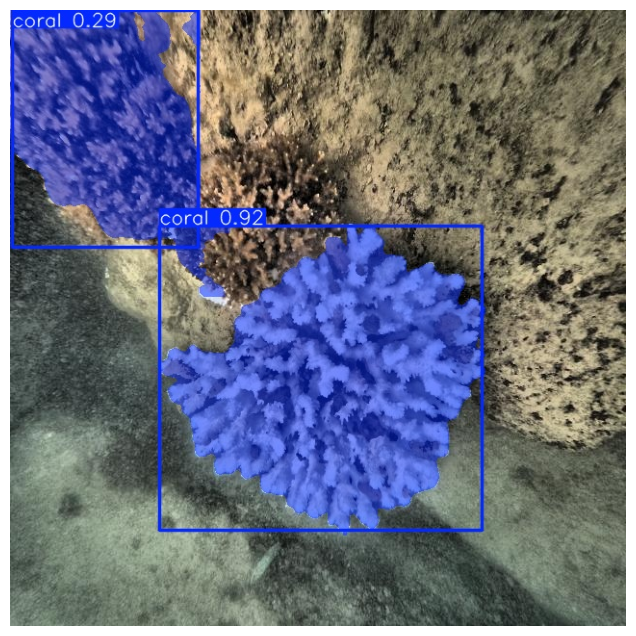

In [ ]:
img = cv2.imread('/content/runs/segment/predict/GOPR6698_JPG.rf.1f24486ab5c42f6070ec103c7153cb1c.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /content/coral-instance-segmentation-2-4/test/images/GOPR6698_JPG.rf.1f24486ab5c42f6070ec103c7153cb1c.jpg: 640x640 2 corals, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


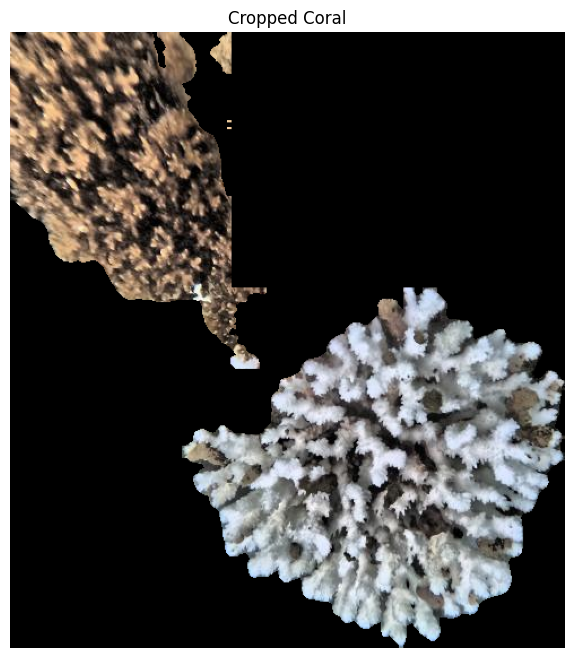

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv11 segmentation model
model_path = '/content/runs/segment/coral_yolo11s_seg_fast/weights/best.pt'
model = YOLO(model_path)

# Path to your new coral image
image_path = '/content/coral-instance-segmentation-2-4/test/images/GOPR6698_JPG.rf.1f24486ab5c42f6070ec103c7153cb1c.jpg'

# Run YOLO inference
results = model.predict(source=image_path, conf=0.25, imgsz=640)
r = results[0]

# Load original image
img = cv2.imread(image_path)

if r.masks is None:
    print("No coral detected!")
else:
    # Extract masks and resize to original image if needed
    masks = r.masks.data.cpu().numpy()  # shape: (N, H_pred, W_pred)

    # Combine multiple coral instances into one mask
    coral_mask = np.any(masks, axis=0).astype(np.uint8)  # 1 = coral

    # Make sure mask matches original image size
    coral_mask_resized = cv2.resize(coral_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Apply mask to original image (black background)
    coral_mask_255 = coral_mask_resized * 255
    coral_masked = cv2.bitwise_and(img, img, mask=coral_mask_255)

    # Optional: crop tight bounding box
    ys, xs = np.where(coral_mask_resized == 1)
    if len(xs) > 0 and len(ys) > 0:
        x_min, x_max = xs.min(), xs.max()
        y_min, y_max = ys.min(), ys.max()
        coral_crop_tight = coral_masked[y_min:y_max, x_min:x_max]
    else:
        coral_crop_tight = coral_masked

    # Visualize cropped coral
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(coral_crop_tight, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Cropped Coral")
    plt.show()


Bleached area percentage: 5.35%


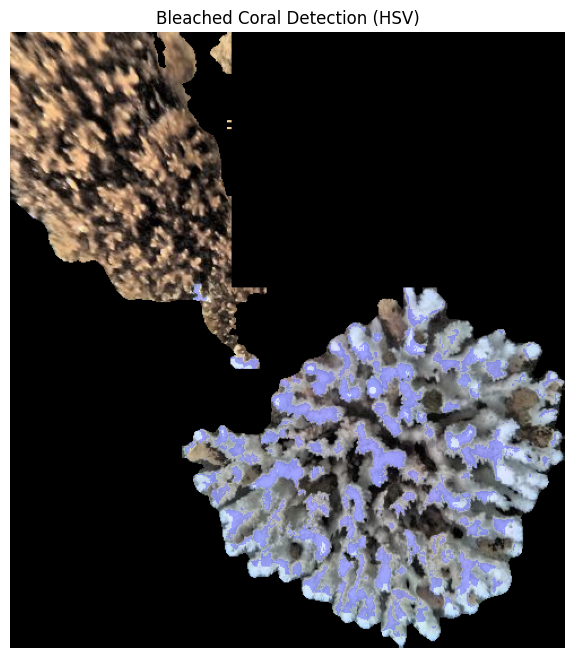

In [ ]:
# Ensure coral_crop_tight exists
if coral_crop_tight is not None:
    # Convert cropped coral to HSV
    hsv = cv2.cvtColor(coral_crop_tight, cv2.COLOR_BGR2HSV)

    # Define HSV range for bleached coral (white areas)
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([179, 30, 255])

    # Create bleached mask
    bleached_mask = cv2.inRange(hsv, lower_white, upper_white)

    # Calculate bleached area percentage
    total_area = np.prod(bleached_mask.shape)  # total pixels in crop
    bleached_area = np.sum(bleached_mask == 255)
    bleached_percentage = (bleached_area / total_area) * 100
    print(f"Bleached area percentage: {bleached_percentage:.2f}%")

    # Visualize bleached area overlay
    overlay = coral_crop_tight.copy()
    overlay[bleached_mask == 255] = [255, 0, 0]  # red overlay

    final_overlay = cv2.addWeighted(coral_crop_tight, 0.7, overlay, 0.3, 0)

    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(final_overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Bleached Coral Detection (HSV)")
    plt.show()

In [ ]:
from google.colab import drive
import shutil
import os

# 1️⃣ Mount Google Drive
drive.mount('/content/drive')

# 2️⃣ Check that the source file exists
source_path = '/content/runs/segment/coral_yolo11s_seg_fast/weights/best.pt'
if not os.path.exists(source_path):
    print("Source file does NOT exist! Check the training folder path.")
else:
    # 3️⃣ Make sure destination folder exists
    save_folder = '/content/drive/MyDrive/'
    os.makedirs(save_folder, exist_ok=True)

    # 4️⃣ Copy model
    dest_path = os.path.join(save_folder, 'coral_yolo11s_seg_best.pt')
    shutil.copy(source_path, dest_path)
    print(f"Model saved successfully to: {dest_path}")


Mounted at /content/drive
Model saved successfully to: /content/drive/MyDrive/coral_yolo11s_seg_best.pt


In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/drive/MyDrive/coral_yolo11s_seg_best.pt')
